# Visualización de series de tiempo para acciones en la bolsa

* En este ejercico se practicó la visualización de datos temporales con un enfoque financiero.
_______________________________________________________________________________________________ 

### Setup

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

_______________________________________________________________________________________________________
### Lectura del archivo

In [2]:
os.chdir('C:/Users/estef/Desktop/data')
df = pd.read_csv('SP500_HIST.csv', index_col = 'Date', parse_dates = ['Date'])
df.sample(5)

,Close/Last,Open,High,Low
Date,,,,
2019-09-03,2906.27,2909.01,2914.39,2891.85
2019-04-04,2879.39,2873.99,2881.28,2867.14
2023-09-29,4288.05,4328.18,4333.15,4274.86
2020-07-16,3215.57,3208.36,3220.39,3198.59
2015-05-07,2088.00,2079.96,2092.90,2074.99


In [3]:
df
#Tenemos datos históricos de las acciones de SP500 desde 09/oct/2014 hasta 08/oct/2024

,Close/Last,Open,High,Low
Date,,,,
2024-10-08,5751.13,5719.14,5757.60,5714.56
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
...,...,...,...,...
2014-10-15,1862.49,1874.18,1874.18,1820.66
2014-10-14,1877.70,1877.11,1898.71,1871.79
2014-10-13,1874.74,1905.65,1912.09,1874.14


In [4]:
# Cambio de nombre de columna Close/Last para facilitar su manejo
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

______________________________________________________________________________________________________
### Análisis univariado

In [5]:
df.shape

(2527, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2527 entries, 2024-10-08 to 2014-10-09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2527 non-null   float64
 1   Open    2527 non-null   float64
 2   High    2527 non-null   float64
 3   Low     2527 non-null   float64
dtypes: float64(4)
memory usage: 98.7 KB


In [7]:
# Cambiar formato de pandas para una visualización más amigable
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2527.00,3260.71,1028.29,1829.08,2362.77,2932.47,4145.39,5762.48
Open,2527.00,3251.22,1047.29,0.00,2362.73,2930.91,4139.93,5762.22
High,2527.00,3268.64,1052.96,0.00,2368.82,2944.25,4167.10,5767.37
Low,2527.00,3232.50,1041.45,0.00,2351.30,2917.91,4119.18,5727.34


In [9]:
# Contar ceros
df[df==0].count() / df.count()

Close   0.00
Open    0.00
High    0.00
Low     0.00
dtype: float64

### Visualización de series de tiempo

In [10]:
df

,Close,Open,High,Low
Date,,,,
2024-10-08,5751.13,5719.14,5757.60,5714.56
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
...,...,...,...,...
2014-10-15,1862.49,1874.18,1874.18,1820.66
2014-10-14,1877.70,1877.11,1898.71,1871.79
2014-10-13,1874.74,1905.65,1912.09,1874.14


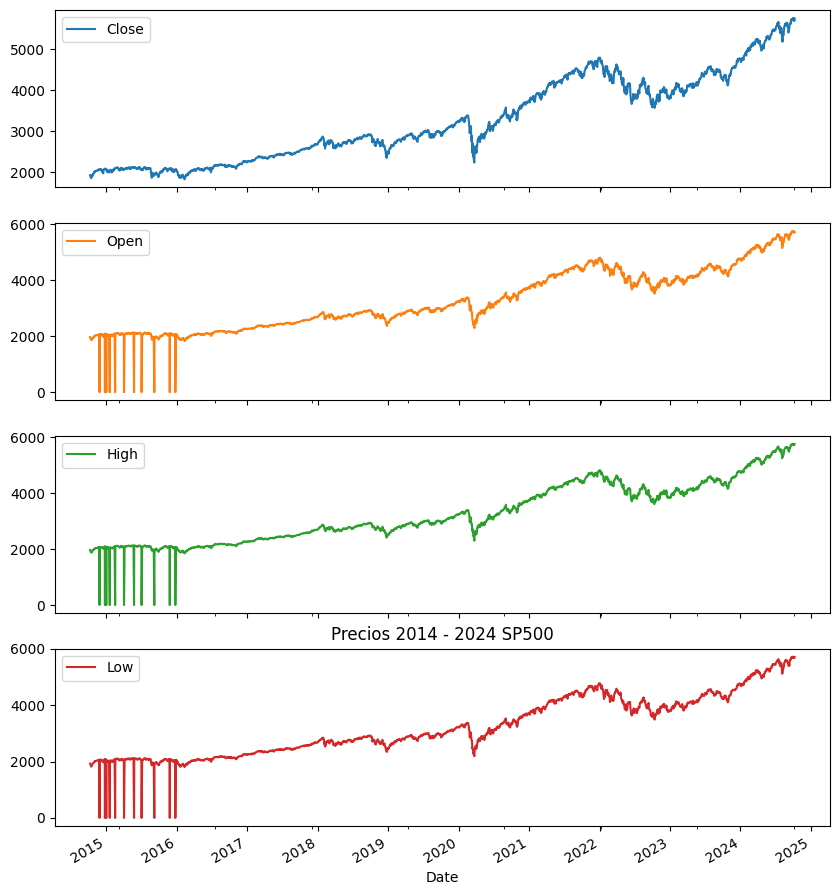

In [11]:
df = df.sort_index()
df['2014':'2024'].plot(subplots = True, figsize=(10,12))
plt.title('Precios 2014 - 2024 SP500')
plt.show()

### Visualización de lags

C:\Users\estef\AppData\Local\Temp\ipykernel_12824\93044238.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close'].asfreq('M').plot(legend=True)
C:\Users\estef\AppData\Local\Temp\ipykernel_12824\93044238.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shifted = df['Close'].asfreq('M').shift(lag).plot(legend=True)


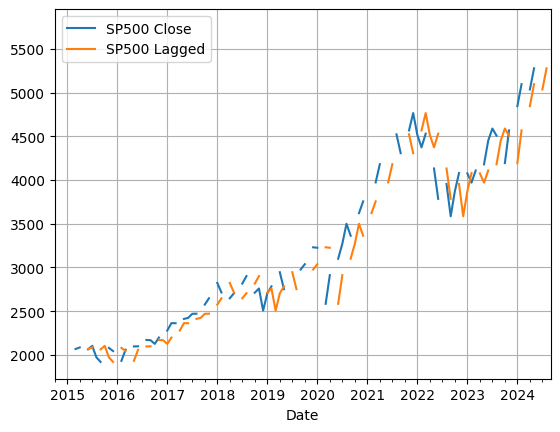

In [12]:
df['Close'].asfreq('M').plot(legend=True)
lag = 3
shifted = df['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['SP500 Close','SP500 Lagged'])
plt.grid()
plt.show()

In [13]:
df['Change'] = df.Close.div(df.Close.shift())
df

,Close,Open,High,Low,Change
Date,,,,,
2014-10-09,1928.21,1967.68,1967.68,1927.56,NaN
2014-10-10,1906.13,1925.63,1936.98,1906.05,0.99
2014-10-13,1874.74,1905.65,1912.09,1874.14,0.98
2014-10-14,1877.70,1877.11,1898.71,1871.79,1.00
2014-10-15,1862.49,1874.18,1874.18,1820.66,0.99
...,...,...,...,...,...
2024-10-02,5709.54,5698.14,5719.63,5674.00,1.00
2024-10-03,5699.94,5698.19,5718.78,5677.37,1.00
2024-10-04,5751.07,5737.48,5753.21,5702.83,1.01


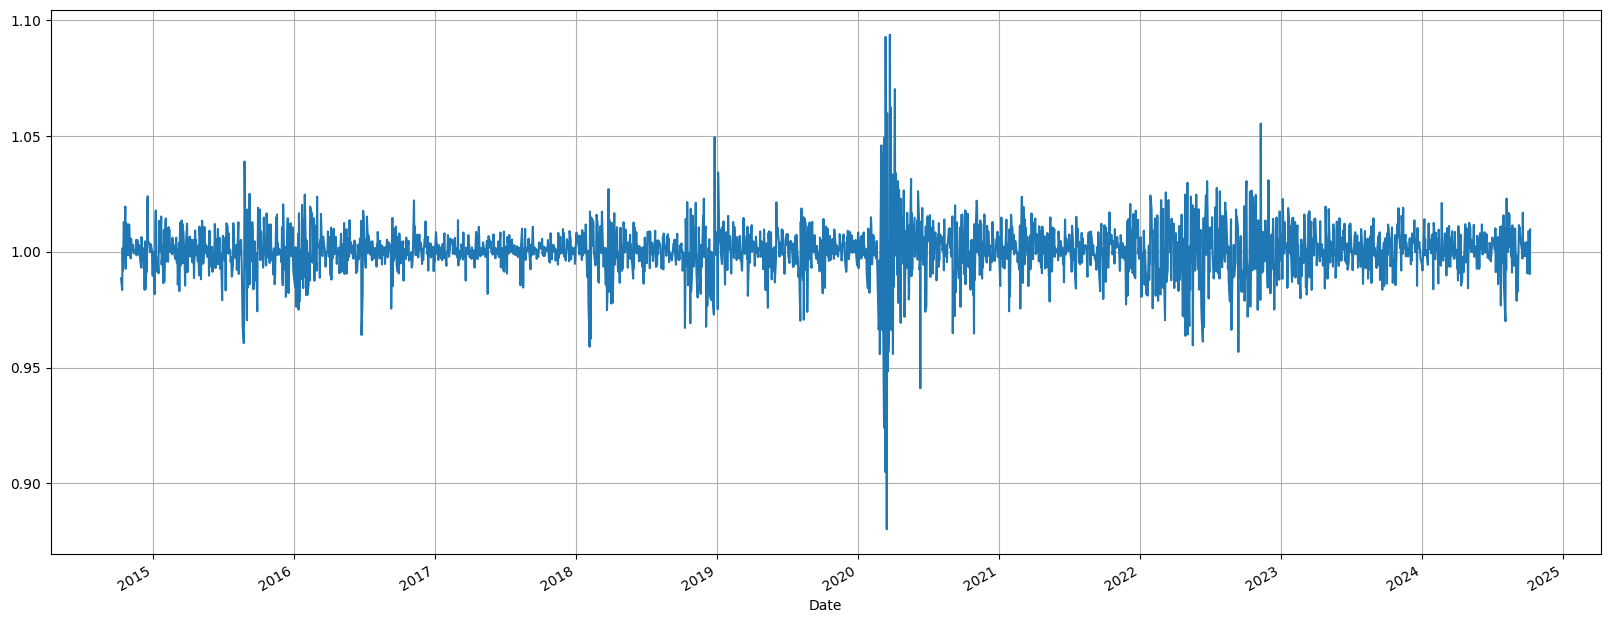

In [14]:
df['Change'].plot(figsize = (20,8)).grid()

In [15]:
df['Return'] = df.Change.sub(1).mul(100)
df

,Close,Open,High,Low,Change,Return
Date,,,,,,
2014-10-09,1928.21,1967.68,1967.68,1927.56,NaN,NaN
2014-10-10,1906.13,1925.63,1936.98,1906.05,0.99,-1.15
2014-10-13,1874.74,1905.65,1912.09,1874.14,0.98,-1.65
2014-10-14,1877.70,1877.11,1898.71,1871.79,1.00,0.16
2014-10-15,1862.49,1874.18,1874.18,1820.66,0.99,-0.81
...,...,...,...,...,...,...
2024-10-02,5709.54,5698.14,5719.63,5674.00,1.00,0.01
2024-10-03,5699.94,5698.19,5718.78,5677.37,1.00,-0.17
2024-10-04,5751.07,5737.48,5753.21,5702.83,1.01,0.90


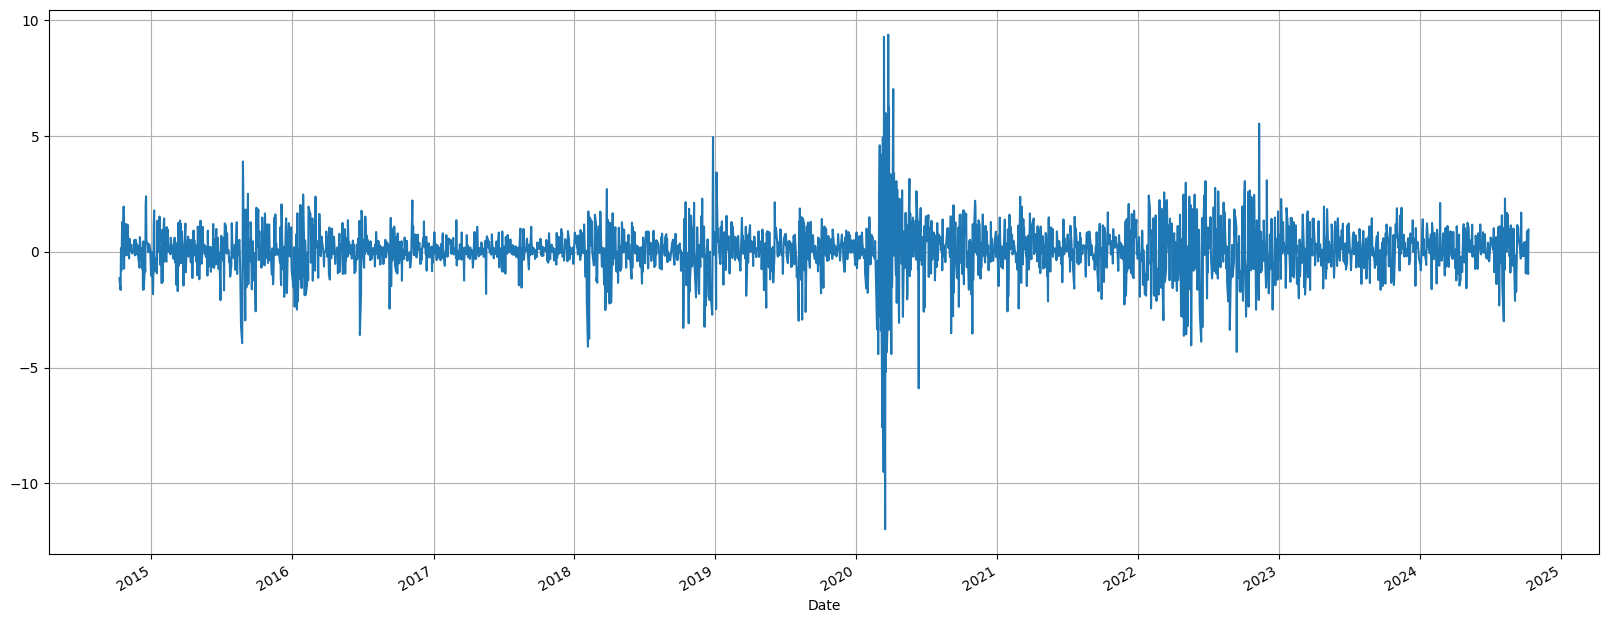

In [16]:
df['Return'].plot(figsize=(20,8)).grid()

### Comparación de series

In [17]:
#Lectura del segundo archivo (Histórico de precios Nikkei225)
df2 = pd.read_csv('NIKKEI225_HIST.csv', index_col = 'Date', parse_dates = ['Date'])
df2

,Open,High,Low,Close
Date,,,,
2024-10-08,"39,021.13","39,117.09","38,817.54","38,937.54"
2024-10-07,"39,239.92","39,560.78","39,195.93","39,332.74"
2024-10-04,"38,594.73","38,735.29","38,501.82","38,635.62"
2024-10-03,"38,459.13","38,856.75","38,457.62","38,552.06"
2024-10-02,"38,136.20","38,213.54","37,651.07","37,808.76"
...,...,...,...,...
2014-10-07,"15,841.17","15,913.52","15,755.57","15,783.83"
2014-10-06,"15,882.28","15,970.65","15,808.22","15,890.95"
2014-10-03,"15,616.48","15,708.65","15,559.07","15,708.65"


In [18]:
# Verificar si hay nulos en df2
df2.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [19]:
df2[df2.isnull().any(axis=1)]

,Open,High,Low,Close
Date,,,,


In [20]:
#Se identifican valores con falta de información indicada con '-'
df2[df2.apply(lambda x: x.str.contains('-').any(), axis=1)]

,Open,High,Low,Close
Date,,,,
2018-12-31,-,-,-,-
2018-12-24,-,-,-,-
2018-11-23,-,-,-,-
2018-10-08,-,-,-,-
2018-09-24,-,-,-,-
2018-09-17,-,-,-,-
2018-05-04,-,-,-,-
2018-05-03,-,-,-,-
2018-04-30,-,-,-,-


In [21]:
df2.info()
# Las variables serán transformadas en valores de tipo numérico

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2470 entries, 2024-10-08 to 2014-10-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    2470 non-null   object
 1   High    2470 non-null   object
 2   Low     2470 non-null   object
 3   Close   2470 non-null   object
dtypes: object(4)
memory usage: 96.5+ KB


In [22]:
df2 = df2.replace({'-': np.nan}) #convertir valores '-' por NaN para despues eliminarlos
df2 = df2.replace({',': ''}, regex=True)  # Eliminar las comas en todas las columnas para poder transformar en valores numéricos
df2.dropna(axis=0, inplace=True) #Eliminar valores NaN
df2[['Open', 'High', 'Low', 'Close']] = df2[['Open', 'High', 'Low', 'Close']].astype('float') #Transformar a variables numéricas
df2.sort_index(inplace=True) #Ordenar index (Date) cronologicamente
df2

,Open,High,Low,Close
Date,,,,
2014-10-01,16173.39,16225.96,16081.01,16082.25
2014-10-02,15895.20,15922.51,15646.40,15661.99
2014-10-03,15616.48,15708.65,15559.07,15708.65
2014-10-06,15882.28,15970.65,15808.22,15890.95
2014-10-07,15841.17,15913.52,15755.57,15783.83
...,...,...,...,...
2024-10-02,38136.20,38213.54,37651.07,37808.76
2024-10-03,38459.13,38856.75,38457.62,38552.06
2024-10-04,38594.73,38735.29,38501.82,38635.62


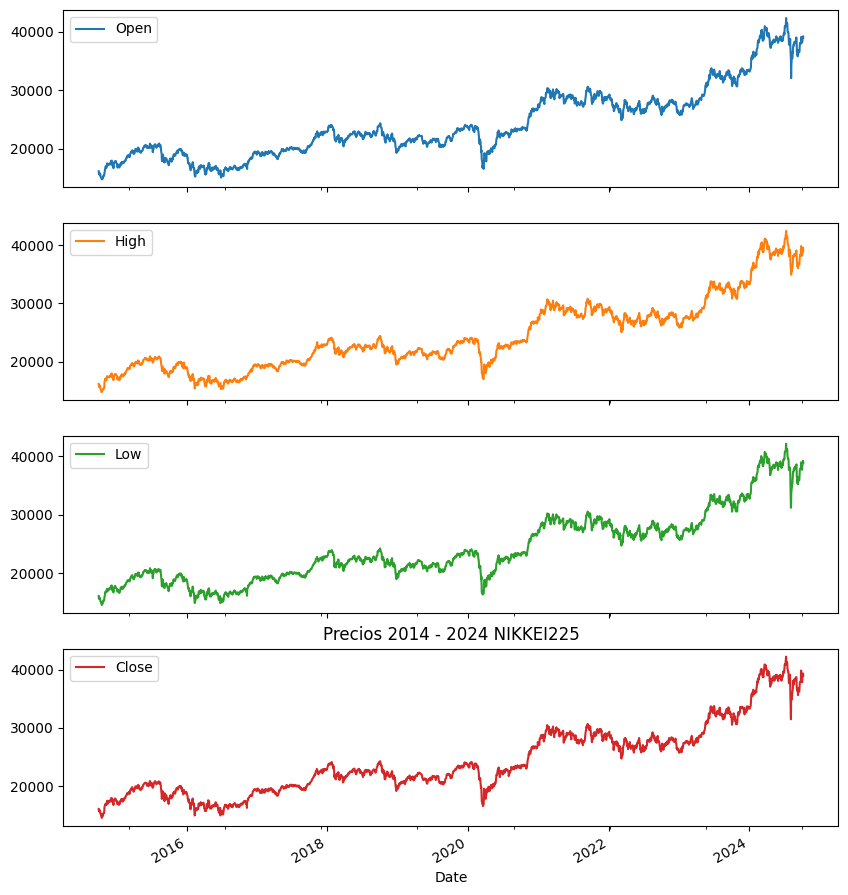

In [23]:
# Visualización de los datos
df2['2014':'2024'].plot(subplots = True, figsize=(10,12))
plt.title('Precios 2014 - 2024 NIKKEI225')
plt.show()

Text(0.5, 1.0, 'Comparación precios historicos SP500 vs NIKKEI 2014-2024')

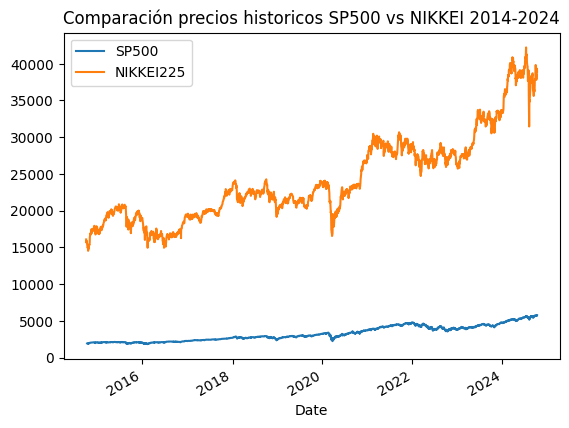

In [24]:
df.Close.plot()
df2.Close.plot()
plt.legend(['SP500','NIKKEI225'])
plt.title('Comparación precios historicos SP500 vs NIKKEI 2014-2024')


Text(0.5, 1.0, 'Comparación SP500 vs NIKKEI225 normalizados')

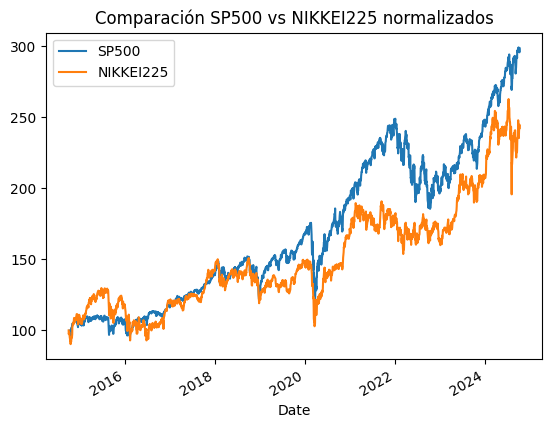

In [25]:
normal_sp = df.Close.div(df.Close.iloc[0]).mul(100)
normal_nk = df2.Close.div(df2.Close.iloc[0]).mul(100)
normal_sp.plot()
normal_nk.plot()
plt.legend(('SP500','NIKKEI225'))
plt.title('Comparación SP500 vs NIKKEI225 normalizados')

### Visualización de medias

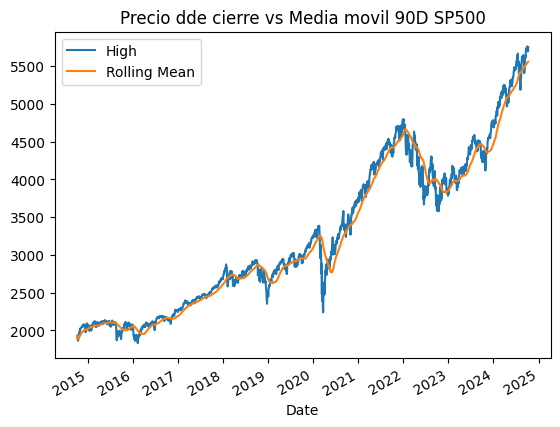

In [26]:
roll_sp = df.Close.rolling('90D').mean()
df.Close.plot()
roll_sp.plot()
plt.title('Precio dde cierre vs Media movil 90D SP500')
plt.legend(['High','Rolling Mean'])

### Visualizaciones financieras

In [27]:
#Se importan librerías de base 
%matplotlib inline 
from pylab import rcParams

#Instala chart_studio 
from chart_studio import plotly 
from chart_studio import grid_objs 
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True)

#from plotly import tools 
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
import statsmodels.api as sm
from numpy.random import normal, seed 
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error


#### Gráfico OHLC

In [37]:
df_jun = df.loc['2015-06']
rango_ohlc = go.Ohlc(x=df_jun.index,
                     open=df_jun['Open'],
                     high=df_jun['High'],
                     low=df_jun['Low'],
                     close=df_jun['Close'])

data = [rango_ohlc]

# Mostrar gráfico
iplot(data)

In [39]:
df_17 = df.loc['2017']
trace = go.Ohlc(x=df_17.index,
                     open=df_17['Open'],
                     high=df_17['High'],
                     low=df_17['Low'],
                     close=df_17['Close'])

data = [trace]

# Mostrar gráfico
iplot(data, filename='simple_ohlc')

#### Gráfico de velas

In [41]:
trace = go.Candlestick(x=df_jun.index,
                       open=df_jun.Open,
                       high=df_jun.High,
                       low=df_jun.Low,
                       close=df_jun.Close)

data= [trace]
iplot(data)

### Descomposición de series 

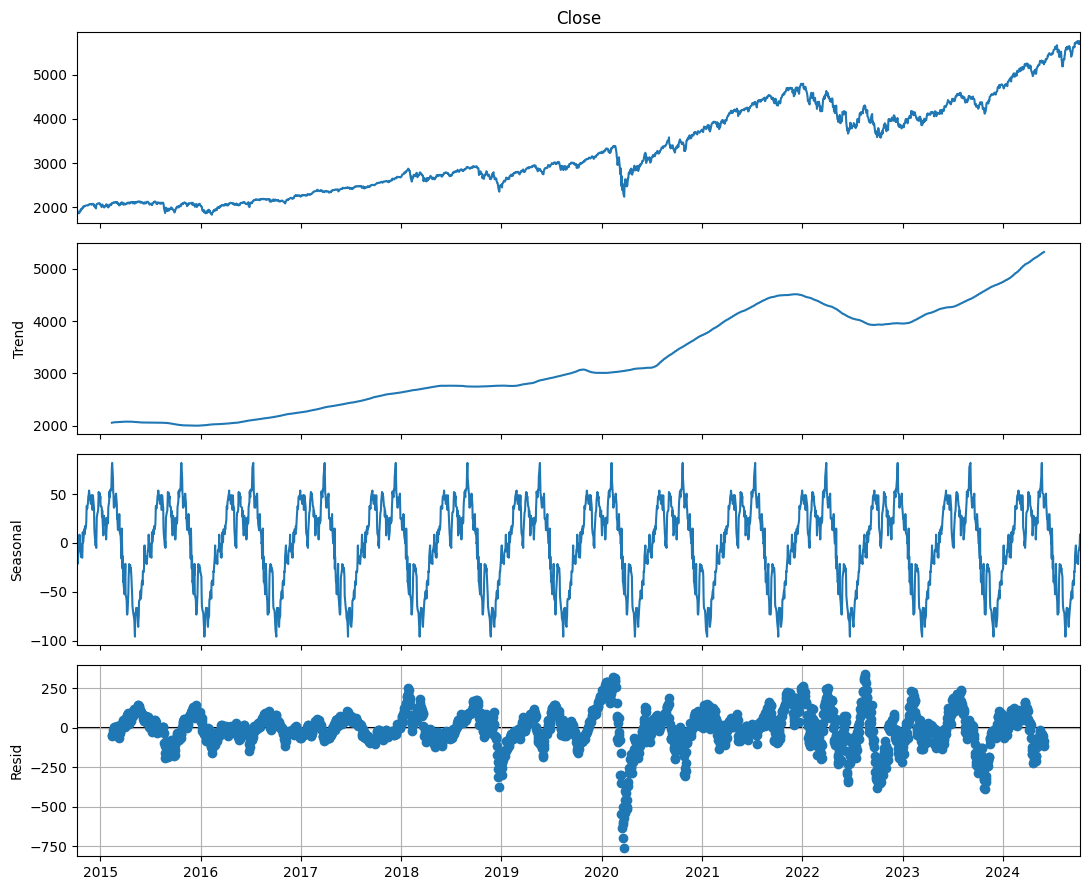

In [43]:
rcParams['figure.figsize']=11,9
decomposed_sp_volume = sm.tsa.seasonal_decompose(df['Close'],period=180)
figure=decomposed_sp_volume.plot()
plt.grid()
plt.show()

### Predicción simple - Medias moviles

In [51]:
train_len = 2500

train = df[0:train_len]
test = df[train_len:]


In [53]:
y_pred_sma = df.copy()
ma_window = 30
y_pred_sma['sma_forecast']=df['High'].rolling(ma_window).mean()
y_pred_sma['sma_forecast'][train_len]=y_pred_sma['sma_forecast'][train_len-1]
y_pred_sma


C:\Users\estef\AppData\Local\Temp\ipykernel_12824\2362070096.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\estef\AppData\Local\Temp\ipykernel_12824\2362070096.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this kee

,Close,Open,High,Low,Change,Return,sma_forecast
Date,,,,,,,
2014-10-09,1928.21,1967.68,1967.68,1927.56,NaN,NaN,NaN
2014-10-10,1906.13,1925.63,1936.98,1906.05,0.99,-1.15,NaN
2014-10-13,1874.74,1905.65,1912.09,1874.14,0.98,-1.65,NaN
2014-10-14,1877.70,1877.11,1898.71,1871.79,1.00,0.16,NaN
2014-10-15,1862.49,1874.18,1874.18,1820.66,0.99,-0.81,NaN
...,...,...,...,...,...,...,...
2024-10-02,5709.54,5698.14,5719.63,5674.00,1.00,0.01,5652.39
2024-10-03,5699.94,5698.19,5718.78,5677.37,1.00,-0.17,5655.26
2024-10-04,5751.07,5737.48,5753.21,5702.83,1.01,0.90,5658.93


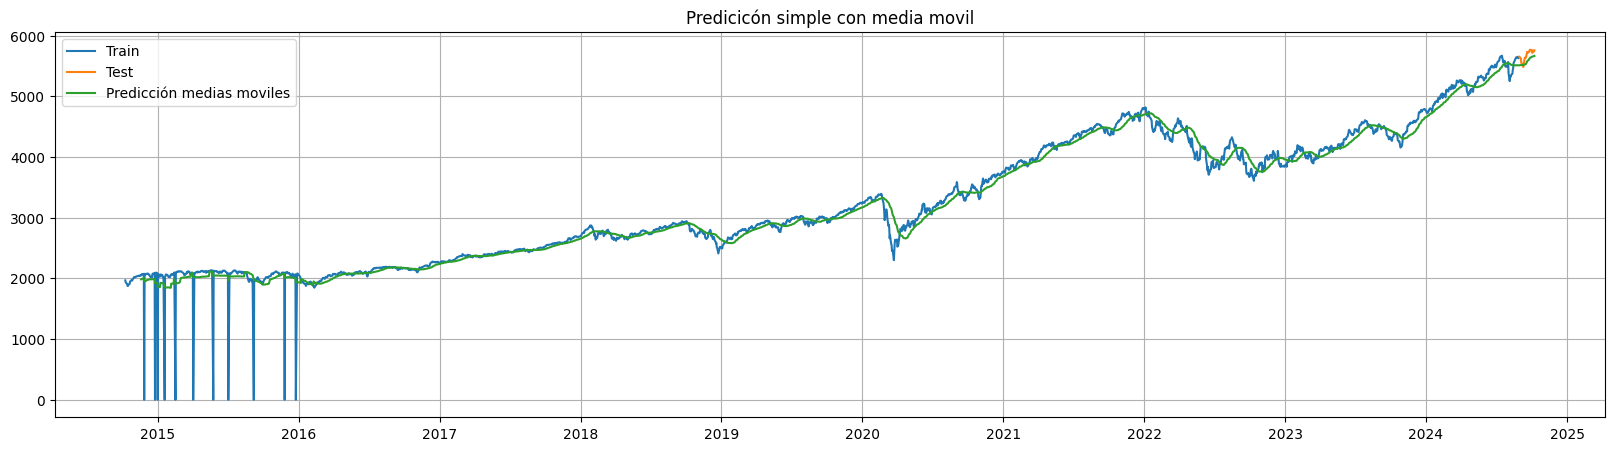

In [57]:
# Gráfica de predicciones
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['High'],label='Train')
plt.plot(test['High'],label='Test')
plt.plot(y_pred_sma['sma_forecast'],label='Predicción medias moviles')
plt.legend(loc='best')
plt.title('Predicicón simple con media movil')  
plt.show()
         

In [58]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['High'],y_pred_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['High']-y_pred_sma['sma_forecast'][train_len:])/test['High'])*100,2)

results=pd.DataFrame({'Method':['Simple moving avarage forecast'],'MAPE':[mape],'RMSE':[rmse]})
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving avarage forecast,102.07,1.63
